## Monthly Updated Prediction

Start Dates of Information:

Ferrero 2021-04-30 <br>
LindtSpruengli 2024-11-30 <br>
all other 2019_01_31 <br>

In [1]:
# loading libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import nan

pd.set_option('display.max_columns', None)

In [2]:
# loading destatis data
path = '../data/processed/combined_data.csv'
df = pd.read_csv(path)
index_list = pd.read_csv('../data/processed/index_list_combined_data.csv', names=['Datum'])
index_list.drop(index_list.index[0], inplace=True)
df.index = index_list['Datum']
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# dropping first column which is just the date
#df = df.iloc[:, 1:]
                # for usage of column numbers in baseline model this is needed

df

,date,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_ Sonstige Nahrungsmittel (ohne Getränke),ErzPr_ Süßwaren (ohne Dauerbackwaren),ErzPr_ Schokoladen und andere Süßwaren,"ErzPr_ Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_ Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee, entkoffeiniert oder geröstet","ErzPr_ Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_ Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_ Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_ Sonstige Nahrungsmittel (ohne Getränke),EinfPr_ Süßwaren (ohne Dauerbackwaren),"EinfPr_ Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_ Nahrungsmittel,"VPI_ Zucker, Marmelade, Honig und andere Süßwaren",VPI_ Schokoladen,VPI_ Süßwaren,VPI_ Alkoholfreie Getränke,"VPI_ Kaffee, Tee und Kakao",VPI_ Kaffee und Ähnliches,VPI_ Tee und teeähnliche Erzeugnisse,VPI_ Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Wert der zum Absatz bestimmten Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Klei

In [3]:
# Defining demand and price::
demand = (df.iloc[:, 45])
price = df.iloc[:, 122]

# Calculating percentage change in demand and price
demand_change = demand.pct_change()
price_change = price.pct_change()

# Calculating price elasticity of demand
df.loc[:, 'elasticity'] = demand_change / price_change
df['elasticity'] = df['elasticity'].replace([np.inf, -np.inf], np.nan)
df
#elasticity = elasticity.replace([np.inf, -np.inf], np.nan)
#elasticity = elasticity.fillna(method='ffill')  # Filling NaN values with forward fill method
#elasticity = elasticity.fillna(method='bfill')  # Filling remaining NaN values with backward fill method
#elasticity.name = 'Elasticity'
# elasticity_df = pd.DataFrame(elasticity)    # creating a dataframe of elasticity as it was a series before and we want to plot it with seaborn which needs a dataframe
# elasticity_df.index = df.index  # setting the index of the elasticity dataframe to be the same as the original dataframe

C:\Users\jmerg\AppData\Local\Temp\ipykernel_29356\1157654685.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  demand_change = demand.pct_change()
C:\Users\jmerg\AppData\Local\Temp\ipykernel_29356\1157654685.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_change = price.pct_change()


,date,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,ErzPr_Nahrungsmittel und Futtermittel,ErzPr_ Sonstige Nahrungsmittel (ohne Getränke),ErzPr_ Süßwaren (ohne Dauerbackwaren),ErzPr_ Schokoladen und andere Süßwaren,"ErzPr_ Schokolade u.a. kakaoh. Lebensm.zub.,in Verp.>2kg","ErzPr_ Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg",ErzPr_ Süßwaren oh. Kakaogeh. (einschl.weißer Schokolade),"ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee und Tee, Kaffee-Ersatz","ErzPr_ Kaffee, entkoffeiniert oder geröstet","ErzPr_ Kaffeemittel m. -geh.,Auszüge,Essenz.,Konzentrate","ErzPr_ Grüner Tee (n. ferment.), schwarzer Tee (ferment.)",ErzPr_ Kräutertees,EinfPr_Nahrungsmittel und Futtermittel,EinfPr_ Sonstige Nahrungsmittel (ohne Getränke),EinfPr_ Süßwaren (ohne Dauerbackwaren),"EinfPr_ Kaffee und Tee, Kaffee-Ersatz",VPI_Nahrungsmittel und alkoholfreie Getränke,VPI_ Nahrungsmittel,"VPI_ Zucker, Marmelade, Honig und andere Süßwaren",VPI_ Schokoladen,VPI_ Süßwaren,VPI_ Alkoholfreie Getränke,"VPI_ Kaffee, Tee und Kakao",VPI_ Kaffee und Ähnliches,VPI_ Tee und teeähnliche Erzeugnisse,VPI_ Kakaopulver oder Ähnliches,"Wert der zum Absatz bestimmten Produktion_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Wert der zum Absatz bestimmten Produktion_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_t_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Gewicht der zum Absatz bestimmten Produktion_kg_ep_Leb-, Honigkuchen, Kekse, Kleingebäck, Waffeln","Menge der zum Absatz bestimmten Produktion_stueck_Leb-, Honigkuchen, Kekse, Klei

In [4]:
# defining target and features
target = 'elasticity'
feature_names = df.iloc[:, [25,88,93,78,166,167,168,169,170]].columns.tolist()          # 144 wert kaffee rausgenommen wegen inhalt der target var!
features =  feature_names       # defining extra object for later additions
# all features: features = [col for col in df.columns if col != target]

# defining X and y
X = df[features]    
y = df[target]

# checking for missing values
missing_values = X.isnull().sum()  
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
Bruttolohn- und -gehaltssumme_WZ08-108                               1
EinfPr_    Süßwaren (ohne Dauerbackwaren)                            0
VPI_      Schokoladen                                                0
ErzPr_        Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg     0
PCOCOUSDM                                                            0
PCOFFROBUSDM                                                         0
Ferrero                                                             27
Mondelez                                                             0
LindtSpruengli                                                      70
dtype: int64


#### Defining Training Periods

In [5]:
# splitting data into time based batches with respective train and test sets
                                                    # option: from sklearn.model_selection import TimeSeriesSplit

# defining batch without Ferrero and LindtSpruengli due to missing values for forst time period
X_batch_1 = X.drop(columns=['Ferrero', 'LindtSpruengli'])
start_date = '2019-01-31'
end_date = '2021-03-31'
X_batch_1 = X_batch_1.loc[start_date:end_date]
y_batch_1 = y.loc[start_date:end_date]

# defining batch with Ferrero for second time period
X_batch_2 = X.drop(columns=['LindtSpruengli'])
start_date = '2021-04-30'
end_date = '2024-10-31'
X_batch_2 = X_batch_2.loc[start_date:end_date]
y_batch_2 = y.loc[start_date:end_date]

# defining batch with LindtSpruengli for third time period
X_batch_3 = X
start_date = '2024-11-30'
end_date = '2025-11-30'
X_batch_3 = X_batch_3.loc[start_date:end_date]
y_batch_3 = y.loc[start_date:end_date]

In [6]:
# Train Test Split for each batch based on dates

# Batch 1
train_start_date_1 = '2019-01-31'
train_end_date_1 = '2021-03-31'     # incoming new data Ferrero on 2021-04-30
test_start_date_1 = '2020-12-31'
test_end_date_1 = '2021-03-31'

X_train_1 = X_batch_1.loc[train_start_date_1:train_end_date_1]
y_train_1 = y_batch_1.loc[train_start_date_1:train_end_date_1]
X_test_1 = X_batch_1.loc[test_start_date_1:test_end_date_1]
y_test_1 = y_batch_1.loc[test_start_date_1:test_end_date_1] 

# Batch 2
train_start_date_2 = '2021-04-30'
train_end_date_2 = '2024-10-31'     # incoming new data LindtSpruengli on 2024-11-30
test_start_date_2 = '2024-07-31'
test_end_date_2 = '2024-10-31'  

X_train_2 = X_batch_2.loc[train_start_date_2:train_end_date_2]
y_train_2 = y_batch_2.loc[train_start_date_2:train_end_date_2]
X_test_2 = X_batch_2.loc[test_start_date_2:test_end_date_2]
y_test_2 = y_batch_2.loc[test_start_date_2:test_end_date_2]

# Batch 3
train_start_date_3 = '2024-11-30'
train_end_date_3 = '2025-08-31'     # end of data 4 months later on 2025-11-30
test_start_date_3 = '2025-08-31'
test_end_date_3 = '2025-11-30'

X_train_3 = X_batch_3.loc[train_start_date_3:train_end_date_3]
y_train_3 = y_batch_3.loc[train_start_date_3:train_end_date_3]
X_test_3 = X_batch_3.loc[test_start_date_3:test_end_date_3]
y_test_3 = y_batch_3.loc[test_start_date_3:test_end_date_3]




#### Feature Availability is different:
Only stock information is avaiable at the current time of prediction, official statistical data is at most at the beginning of the next month available <br>
<br>
Solution: lagged features must be included in training!

In [7]:
# defining lagged features for batch 1

features_lagged_1 = X_train_1.iloc[:, 0:4].shift(1)  # creating lagged features for the first 4 features in the training set of batch 1
features_lagged_names_1 = features_lagged_1.columns.tolist()  # storing the names of the lagged features in a separate list for later use
features_lagged_1.columns = [col + '_lagged' for col in features_lagged_1.columns]  # renaming lagged features to distinguish them from original features
features_lagged_1 = features_lagged_1.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
features_lagged_1 = features_lagged_1.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method

# combining original features with lagged features for training and dropping original features which are now redundant due to lagged features
X_train_1_combined = pd.concat([X_train_1, features_lagged_1], axis=1)
X_train_1_combined.drop(columns=feature_names[0:4], inplace=True)  # dropping original features which are now redundant due to lagged features

# same for test set
features_lagged_test_1 = X_test_1.iloc[:, 0:4].shift(1) 
features_lagged_test_1.columns = [col + '_lagged' for col in features_lagged_test_1.columns]  # renaming lagged features to distinguish them from original features
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_test_1 = features_lagged_test_1.fillna(features_lagged_1.iloc[-1])  # filling NaN values in lagged features with last row of lagged features from training set
features_lagged_test_1 = features_lagged_test_1.fillna(features_lagged_1.iloc[0])  # filling remaining NaN values in lagged features with first row of lagged features from training set
X_test_1_combined = pd.concat([X_test_1, features_lagged_test_1], axis=1)
X_test_1_combined.drop(columns=feature_names[0:4], inplace=True)  # dropping original features which are now redundant due to lagged features


# defining lagged features for batch 2
features_lagged_2 = X_train_2.iloc[:, 0:4].shift(1)  # creating lagged features for the first 4 features in the training set of batch 2
features_lagged_names_2 = features_lagged_2.columns.tolist()  # storing the names of the lagged features in a separate list for later use
features_lagged_2.columns = [col + '_lagged' for col in features_lagged_2.columns]  # renaming lagged features to distinguish them from original features

# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_2 = features_lagged_2.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
features_lagged_2 = features_lagged_2.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method    

# combining original features with lagged features for training and dropping original features which are now redundant due to lagged features
X_train_2_combined = pd.concat([X_train_2, features_lagged_2], axis=1)
X_train_2_combined.drop(columns=feature_names[0:4], inplace=True)  # dropping original features which are now redundant due to lagged features

# same for test set
features_lagged_test_2 = X_test_2.iloc[:, 0:4].shift(1) 
features_lagged_test_2.columns = [col + '_lagged' for col in features_lagged_test_2.columns]  # renaming lagged features to distinguish them from original features
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_test_2 = features_lagged_test_2.fillna(features_lagged_2.iloc[-1])  # filling NaN values in lagged features with last row of lagged features from training set
features_lagged_test_2 = features_lagged_test_2.fillna(features_lagged_2.iloc[0])  # filling remaining NaN values in lagged features with first row of lagged features from training set
X_test_2_combined = pd.concat([X_test_2, features_lagged_test_2], axis=1)
X_test_2_combined.drop(columns=feature_names[0:4], inplace=True)  # dropping original features which are now redundant due to lagged features


# defining lagged features for batch 3
features_lagged_3 = X_train_3.iloc[:, 0:4].shift(1)  # creating lagged features for the first 4 features in the training set of batch 3
features_lagged_names_3 = features_lagged_3.columns.tolist()  # storing the names of the lagged features in a separate list for later use
features_lagged_3.columns = [col + '_lagged' for col in features_lagged_3.columns]  # renaming lagged features to distinguish them from original features   
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_3 = features_lagged_3.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
features_lagged_3 = features_lagged_3.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method    

# combining original features with lagged features for training and dropping original features which are now redundant due to lagged features
X_train_3_combined = pd.concat([X_train_3, features_lagged_3], axis=1)
X_train_3_combined.drop(columns=feature_names[0:4], inplace=True)  # dropping original features which are now redundant due to lagged features
# same for test set
features_lagged_test_3 = X_test_3.iloc[:, 0:4].shift(1) 
features_lagged_test_3.columns = [col + '_lagged' for col in features_lagged_test_3.columns]  # renaming lagged features to distinguish them from original features
# filling NaN values in lagged features with data from training set to avoid data leakage
features_lagged_test_3 = features_lagged_test_3.fillna(features_lagged_3.iloc[-1])  # filling NaN values in lagged features with last row of lagged features from training set
features_lagged_test_3 = features_lagged_test_3.fillna(features_lagged_3.iloc[0])  # filling remaining NaN values in lagged features with first row of lagged features from training set
X_test_3_combined = pd.concat([X_test_3, features_lagged_test_3], axis=1)
X_test_3_combined.drop(columns=feature_names[0:4], inplace=True)  # dropping original features which are now redundant due to lagged features


C:\Users\jmerg\AppData\Local\Temp\ipykernel_29356\2508349551.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_lagged_1 = features_lagged_1.fillna(method='bfill')  # filling NaN values in lagged features with backward fill method
C:\Users\jmerg\AppData\Local\Temp\ipykernel_29356\2508349551.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_lagged_1 = features_lagged_1.fillna(method='ffill')  # filling remaining NaN values in lagged features with forward fill method
C:\Users\jmerg\AppData\Local\Temp\ipykernel_29356\2508349551.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_lagged_2 = features_lagged_2.fillna(method='bfill')  # filling NaN values in lagged features with backward fil

In [8]:
# imputation and scaling of features for batch 1
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline # using imblearn pipeline to avoid data leakage during imputation and scaling

# creating pipeline for imputation and scaling

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler)
])

# fitting pipeline on training data and transforming both training and test data for each batch

X_train_1_processed = pipeline.fit_transform(X_train_1_combined)
X_test_1_processed = pipeline.transform(X_test_1_combined)

# imputation and scaling of features for batch 2
X_train_2_processed = pipeline.fit_transform(X_train_2_combined)
X_test_2_processed = pipeline.transform(X_test_2_combined)

# imputation and scaling of features for batch 3
X_train_3_processed = pipeline.fit_transform(X_train_3_combined)
X_test_3_processed = pipeline.transform(X_test_3_combined)


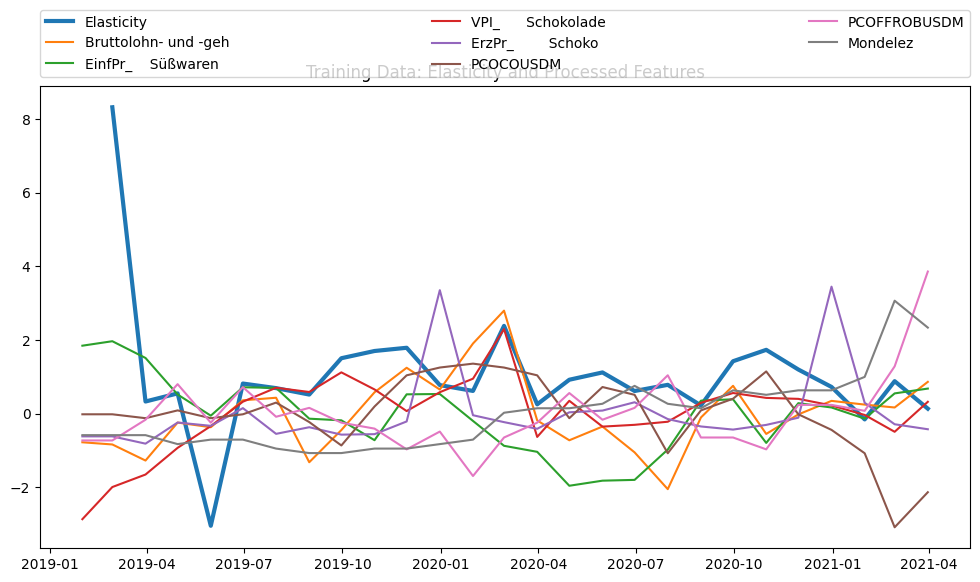

In [13]:
# plotting target and processed features to see how they look like after imputation and scaling
plt.figure(figsize=(12, 6))
plt.plot(y_train_1, label='Elasticity', linewidth=3)
X_train_1_processed_df = pd.DataFrame(X_train_1_processed, columns=X_train_1.columns, index=X_train_1.index)
for feature in X_train_1.columns:
    plt.plot(X_train_1_processed_df[feature], label=feature[:20])  # plotting only first 20 characters of feature name for better visibility
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=3, mode="expand", borderaxespad=0.)
plt.title('Training Data: Elasticity and Processed Features')
plt.show()

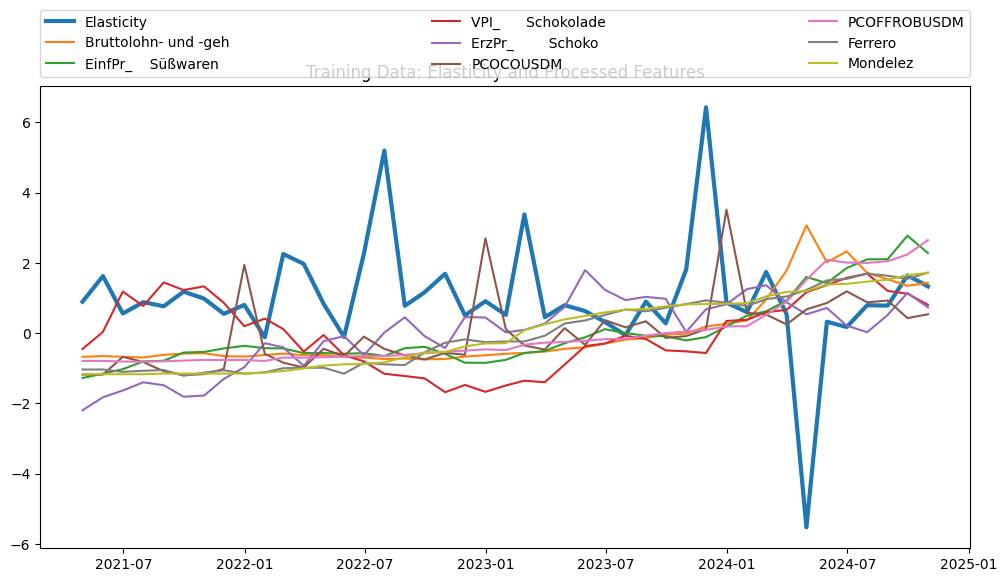

In [14]:
# plotting target and processed features to see how they look like after imputation and scaling
plt.figure(figsize=(12, 6))
plt.plot(y_train_2, label='Elasticity', linewidth=3)
X_train_2_processed_df = pd.DataFrame(X_train_2_processed, columns=X_train_2.columns, index=X_train_2.index)
for feature in X_train_2.columns:
    plt.plot(X_train_2_processed_df[feature], label=feature[:20])  # plotting only first 20 characters of feature name for better visibility
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=3, mode="expand", borderaxespad=0.)
plt.title('Training Data: Elasticity and Processed Features')
plt.show()

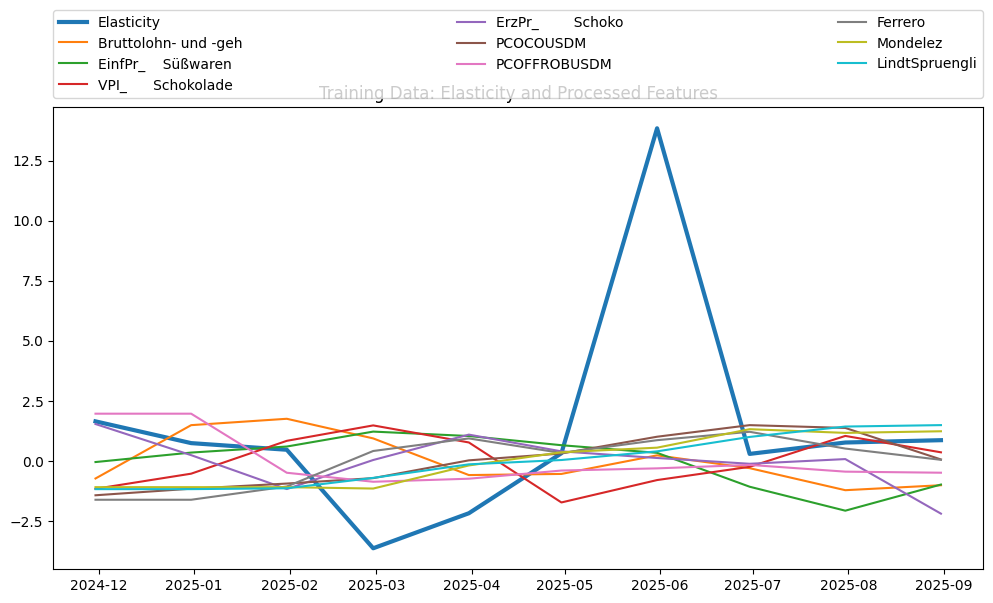

In [15]:
# plotting target and processed features to see how they look like after imputation and scaling
plt.figure(figsize=(12, 6))
plt.plot(y_train_3, label='Elasticity', linewidth=3)
X_train_3_processed_df = pd.DataFrame(X_train_3_processed, columns=X_train_3.columns, index=X_train_3.index)
for feature in X_train_3.columns:
    plt.plot(X_train_3_processed_df[feature], label=feature[:20])  # plotting only first 20 characters of feature name for better visibility
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=3, mode="expand", borderaxespad=0.)
plt.title('Training Data: Elasticity and Processed Features')
plt.show()

time lag of 2 months or more should be considered for coffee futures <br>
no time lag for cacao futures needed

In [21]:
# checking for missing values after imputation
missing_values_after_imputation = pd.DataFrame(X_train_processed, columns=X_train_features).isnull().sum()
print("Missing values in each column after imputation:")
print(missing_values_after_imputation)

Missing values in each column after imputation:
Bruttolohn- und -gehaltssumme_WZ08-108                              0
EinfPr_    Süßwaren (ohne Dauerbackwaren)                           0
VPI_      Schokoladen                                               0
ErzPr_        Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg    0
PCOCOUSDM                                                           0
PCOFFROBUSDM                                                        0
Mondelez                                                            0
dtype: int64


In [22]:
# imputing missing values in target variable with 0
y_train_imputed = y_train.fillna(0)
y_test_imputed = y_test.fillna(0)

## ARIMA Model

In [ ]:
# evaluate ARIMA model for different orders (p, d, q) and return the mean relative error, mean absolute error and r2 score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

def evaluate_arima_model(X_train, y_train, X_test, y_test, order):
    # fitting ARIMA model on training data
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()
    
    # making predictions on test data
    y_pred = model_fit.forecast(steps=len(y_test))
    
    # calculating mean relative error, mean absolute error and r2 score
    mean_relative_error_arima = np.mean(np.abs((y_test - y_pred) / y_test))
    mean_absolute_error_arima = mean_absolute_error(y_test, y_pred)
    r2_arima = r2_score(y_test, y_pred)
    
    return mean_relative_error_arima, mean_absolute_error_arima, r2_arima

# gridsearch for ARIMA hyperparameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
best_score_mre_arima = float('inf')
best_order_mre_arima = None   
best_score_mae_arima = float('inf')
best_order_mae_arima = None
best_score_r2_arima = float('-inf')
best_order_r2_arima = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mean_relative_error_arima, mean_absolute_error_arima, r2_arima = evaluate_arima_model(X_train_processed, y_train_imputed, X_test_processed, y_test_imputed, order)
            print(f'ARIMA{order} - Mean Relative Error: {mean_relative_error_arima}, Mean Absolute Error: {mean_absolute_error_arima}, R2 Score: {r2_arima}')
            if mean_relative_error_arima < best_score_mre_arima:
                best_score_mre_arima = mean_relative_error_arima
                best_order_mre_arima = order
            if mean_absolute_error_arima < best_score_mae_arima:
                best_score_mae_arima = mean_absolute_error_arima
                best_order_mae_arima = order
            if r2_arima > best_score_r2_arima:
                best_score_r2_arima = r2_arima
                best_order_r2_arima = order

print(f'Best ARIMA order (Mean Relative Error): {best_order_mre_arima} with Mean Relative Error: {best_score_mre_arima}')
print(f'Best ARIMA order (Mean Absolute Error): {best_order_mae_arima} with Mean Absolute Error: {best_score_mae_arima}')
print(f'Best ARIMA order (R2 Score): {best_order_r2_arima} with R2 Score: {best_score_r2_arima}')

# saving results of ARIMA gridsearch in a dataframe for better visualization
arima_results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mean_relative_error_arima, mean_absolute_error_arima, r2_arima = evaluate_arima_model(X_train_processed, y_train_imputed, X_test_processed, y_test_imputed, order)
            arima_results.append({'order': order, 'mean_relative_error': mean_relative_error_arima, 'mean_absolute_error': mean_absolute_error_arima, 'r2_score': r2_arima})
arima_results_df = pd.DataFrame(arima_results)
#arima_results_df.sort_values(by='mean_relative_error', inplace=True)
arima_results_df.sort_values(by='mean_absolute_error', inplace=True)
arima_results_df



c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

ARIMA(0, 0, 0) - Mean Relative Error: 3.973276420376177, Mean Absolute Error: 0.7004685211210818, R2 Score: -2.731927819153149
ARIMA(0, 0, 1) - Mean Relative Error: 3.9600900170894784, Mean Absolute Error: 0.6924913399731234, R2 Score: -2.6972208356708114
ARIMA(0, 0, 2) - Mean Relative Error: 3.1966446541592193, Mean Absolute Error: 0.5076455185633499, R2 Score: -1.3578934916295142
ARIMA(0, 1, 0) - Mean Relative Error: 4.388247101672613, Mean Absolute Error: 0.8020478905469818, R2 Score: -3.5817277894266226
ARIMA(0, 1, 1) - Mean Relative Error: 3.9732962096683755, Mean Absolute Error: 0.7004733652797502, R2 Score: -2.7319656051126535
ARIMA(0, 1, 2) - Mean Relative Error: 3.973481773123468, Mean Absolute Error: 0.69826028619196, R2 Score: -2.7274326547533105
ARIMA(1, 0, 0) - Mean Relative Error: 3.991496440825151, Mean Absolute Error: 0.7026537930207952, R2 Score: -2.7630462562018203


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statesp

ARIMA(1, 0, 1) - Mean Relative Error: 3.3241133628728936, Mean Absolute Error: 0.518735188996613, R2 Score: -1.6020912567492194
ARIMA(1, 0, 2) - Mean Relative Error: 3.2019425033856175, Mean Absolute Error: 0.4835937435867662, R2 Score: -1.4192715551654413
ARIMA(1, 1, 0) - Mean Relative Error: 5.0563734630629344, Mean Absolute Error: 1.05193343965139, R2 Score: -5.668861773077643
ARIMA(1, 1, 1) - Mean Relative Error: 3.9858455513202804, Mean Absolute Error: 0.7020041713126042, R2 Score: -2.753153496047039
ARIMA(1, 1, 2) - Mean Relative Error: 4.054200629793772, Mean Absolute Error: 0.7264657988363024, R2 Score: -2.897628739776408
ARIMA(2, 0, 0) - Mean Relative Error: 4.02146643983907, Mean Absolute Error: 0.7123745471817635, R2 Score: -2.826353876250369
ARIMA(2, 0, 1) - Mean Relative Error: 3.106538775373098, Mean Absolute Error: 0.4911033462541016, R2 Score: -1.17937970756671
ARIMA(2, 0, 2) - Mean Relative Error: 3.223122166276516, Mean Absolute Error: 0.5336424437124626, R2 Score: -1

c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

ARIMA(2, 1, 1) - Mean Relative Error: 4.202511815203483, Mean Absolute Error: 0.77179924165939, R2 Score: -3.23594811805462
ARIMA(2, 1, 2) - Mean Relative Error: 4.230494880772641, Mean Absolute Error: 0.7806757063770692, R2 Score: -3.288434927947293
Best ARIMA order (Mean Relative Error): (2, 0, 1) with Mean Relative Error: 3.106538775373098
Best ARIMA order (Mean Absolute Error): (1, 0, 2) with Mean Absolute Error: 0.4835937435867662
Best ARIMA order (R2 Score): (2, 0, 1) with R2 Score: -1.17937970756671


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statesp

,order,mean_relative_error,mean_absolute_error,r2_score
8,"(1, 0, 2)",3.201943,0.483594,-1.419272
13,"(2, 0, 1)",3.106539,0.491103,-1.179380
2,"(0, 0, 2)",3.196645,0.507646,-1.357893
7,"(1, 0, 1)",3.324113,0.518735,-1.602091
14,"(2, 0, 2)",3.223122,0.533642,-1.428026
1,"(0, 0, 1)",3.960090,0.692491,-2.697221
5,"(0, 1, 2)",3.973482,0.698260,-2.727433
0,"(0, 0, 0)",3.973276,0.700469,-2.731928
4,"(0, 1, 1)",3.973296,0.700473,-2.731966
10,"(1, 1, 1)",3.985846,0.702004,-2.753153


batch 1, choice ARIMA: (2,0,1)

## ARIMAX Model

In [32]:
# evaluate ARIMAX model for different orders (p, d, q) and return the mean relative error, mean absolute error and r2 score
from statsmodels.tsa.statespace.sarimax import SARIMAX
def evaluate_arimax_model(X_train, y_train, X_test, y_test, order):
    # fitting ARIMAX model on training data
    model = SARIMAX(y_train, exog=X_train, order=order)
    model_fit = model.fit(disp=False)
    
    # making predictions on test data
    y_pred = model_fit.forecast(steps=len(y_test), exog=X_test)
    
    # calculating mean relative error, mean absolute error and r2 score
    mean_relative_error_arimax = np.mean(np.abs((y_test - y_pred) / y_test))
    mean_absolute_error_arimax = mean_absolute_error(y_test, y_pred)
    r2_arimax = r2_score(y_test, y_pred)
    
    return mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax

# gridsearch for ARIMAX hyperparameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
best_score_mre_arimax = float('inf')
best_order_mre_arimax = None
best_score_mae_arimax = float('inf')
best_order_mae_arimax = None
best_score_r2_arimax = float('-inf')
best_order_r2_arimax = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax = evaluate_arimax_model(X_train_processed, y_train_imputed, X_test_processed, y_test_imputed, order)
            print(f'ARIMAX{order} - Mean Relative Error: {mean_relative_error_arimax}, Mean Absolute Error: {mean_absolute_error_arimax}, R2 Score: {r2_arimax}')
            if mean_relative_error_arimax < best_score_mre_arimax:
                best_score_mre_arimax = mean_relative_error_arimax
                best_order_mre_arimax = order
            if mean_absolute_error_arimax < best_score_mae_arimax:
                best_score_mae_arimax = mean_absolute_error_arimax
                best_order_mae_arimax = order
            if r2_arimax > best_score_r2_arimax:
                best_score_r2_arimax = r2_arimax
                best_order_r2_arimax = order
print(f'Best ARIMAX order (Mean Relative Error): {best_order_mre_arimax} with Mean Relative Error: {best_score_mre_arimax}')
print(f'Best ARIMAX order (Mean Absolute Error): {best_order_mae_arimax} with Mean Absolute Error: {best_score_mae_arimax}')
print(f'Best ARIMAX order (R2 Score): {best_order_r2_arimax} with R2 Score: {best_score_r2_arimax}')

# saving results of ARIMAX gridsearch in a dataframe for better visualization
arimax_results = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mean_relative_error_arimax, mean_absolute_error_arimax, r2_arimax = evaluate_arimax_model(X_train_processed, y_train_imputed, X_test_processed, y_test_imputed, order)
            arimax_results.append({'order_arimax': order, 'mean_relative_error_arimax': mean_relative_error_arimax, 'mean_absolute_error_arimax': mean_absolute_error_arimax, 'r2_score_arimax': r2_arimax})
arimax_results_df = pd.DataFrame(arimax_results)
#arimax_results_df.sort_values(by='mean_relative_error_arimax', inplace=True)
arimax_results_df.sort_values(by='mean_absolute_error_arimax', inplace=True)
arimax_results_df

c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

ARIMAX(0, 0, 0) - Mean Relative Error: 1.4667225867289564, Mean Absolute Error: 0.3317739022986643, R2 Score: 0.3468473809018836
ARIMAX(0, 0, 1) - Mean Relative Error: 2.046726394128478, Mean Absolute Error: 0.42243964373661447, R2 Score: -0.12878390885443425
ARIMAX(0, 0, 2) - Mean Relative Error: 8.1405507659602, Mean Absolute Error: 2.294057730695314, R2 Score: -38.42343240627561
ARIMAX(0, 1, 0) - Mean Relative Error: 7.902575110434837, Mean Absolute Error: 1.911618840733694, R2 Score: -28.11496423869166
ARIMAX(0, 1, 1) - Mean Relative Error: 4.521194202234191, Mean Absolute Error: 1.0890220808385955, R2 Score: -6.255866030057146


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

ARIMAX(0, 1, 2) - Mean Relative Error: 17.70901414378875, Mean Absolute Error: 3.3376125869070385, R2 Score: -112.56782010398555
ARIMAX(1, 0, 0) - Mean Relative Error: 3.2690155001756267, Mean Absolute Error: 0.5711107373450577, R2 Score: -1.9906774028480245
ARIMAX(1, 0, 1) - Mean Relative Error: 4.057991090015011, Mean Absolute Error: 0.9780607594449588, R2 Score: -5.01466952568971


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

ARIMAX(1, 0, 2) - Mean Relative Error: 17.893041722826275, Mean Absolute Error: 3.422187851694554, R2 Score: -118.13269641484526
ARIMAX(1, 1, 0) - Mean Relative Error: 4.508896040439668, Mean Absolute Error: 1.1767689881045573, R2 Score: -8.971308398568546
ARIMAX(1, 1, 1) - Mean Relative Error: 22.33916166195679, Mean Absolute Error: 5.01668841642133, R2 Score: -221.07950035557778
ARIMAX(1, 1, 2) - Mean Relative Error: 34.24680041155334, Mean Absolute Error: 7.601608158989777, R2 Score: -479.40616089985207


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-pack

ARIMAX(2, 0, 0) - Mean Relative Error: 5.693099123978283, Mean Absolute Error: 1.117805598146869, R2 Score: -7.804434836915952
ARIMAX(2, 0, 1) - Mean Relative Error: 22.33464913153514, Mean Absolute Error: 5.0430064707990825, R2 Score: -223.59114078744736


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarni

ARIMAX(2, 0, 2) - Mean Relative Error: 38.20808891307098, Mean Absolute Error: 8.510274104688712, R2 Score: -578.893786550345
ARIMAX(2, 1, 0) - Mean Relative Error: 7.098799203221227, Mean Absolute Error: 1.2124568256966701, R2 Score: -13.536224450602537


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\stat

ARIMAX(2, 1, 1) - Mean Relative Error: 25.81988858617545, Mean Absolute Error: 5.818065379830765, R2 Score: -292.4429089199825
ARIMAX(2, 1, 2) - Mean Relative Error: 21.73142277696167, Mean Absolute Error: 4.8382940284663665, R2 Score: -204.6546039214873
Best ARIMAX order (Mean Relative Error): (0, 0, 0) with Mean Relative Error: 1.4667225867289564
Best ARIMAX order (Mean Absolute Error): (0, 0, 0) with Mean Absolute Error: 0.3317739022986643
Best ARIMAX order (R2 Score): (0, 0, 0) with R2 Score: 0.3468473809018836


c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

,order_arimax,mean_relative_error_arimax,mean_absolute_error_arimax,r2_score_arimax
0,"(0, 0, 0)",1.466723,0.331774,0.346847
1,"(0, 0, 1)",2.046726,0.422440,-0.128784
6,"(1, 0, 0)",3.269016,0.571111,-1.990677
7,"(1, 0, 1)",4.057991,0.978061,-5.014670
4,"(0, 1, 1)",4.521194,1.089022,-6.255866
12,"(2, 0, 0)",5.693099,1.117806,-7.804435
9,"(1, 1, 0)",4.508896,1.176769,-8.971308
15,"(2, 1, 0)",7.098799,1.212457,-13.536224
3,"(0, 1, 0)",7.902575,1.911619,-28.114964
2,"(0, 0, 2)",8.140551,2.294058,-38.423432


batch 1, ARIMAX: choice of (0,0,0)

### Modeltraining on extending database and evaluation on updating month

Idea: <br>
<br>
Training: 2019-01-01 unitl 20-12-31         Prediction and Evaluation: 2021-01-31 <br>
Training: 2019-01-01 until 21-01-31         Prediction and Evaluation: 2021-02-28 <br>
and so on.. <br>
<br>
Update of new exogene variable (Ferrero) on 2021-03-31 and LindtSpruengli on 2024-10-31

In [38]:
X_train_combined.iloc[:, 0]

Datum
2019-01-31    2263.335036
2019-02-28    2255.804973
2019-03-31    2200.484674
2019-04-30    2331.131022
2019-05-31    2315.072400
2019-06-30    2407.731088
2019-07-31    2416.529621
2019-08-31    2194.698416
2019-09-30    2305.341714
2019-10-31    2435.274540
2019-11-30    2519.662532
2019-12-31    2444.792078
2020-01-31    2603.075561
2020-02-29    2716.214398
2020-03-31    2338.470536
2020-04-30    2270.238697
2020-05-31    2317.453932
2020-06-30    2228.617636
2020-07-31    2102.077132
2020-08-31    2348.676309
2020-09-30    2457.611924
2020-10-31    2292.054176
2020-11-30    2359.243716
Name: PCOCOUSDM, dtype: float64

In [ ]:
# training best ARIMAX model on batch 1 while adding each month one by one and evaluating on next month to see how the model performs with more data

# converting X_train_processed and X_test_processed back to dataframes for easier handling of indices and columns
X_train_processed = pd.DataFrame(X_train_processed, columns=X_train_combined.columns, index=X_train_combined.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=X_test_combined.columns, index=X_test_combined.index)

# defining empty lists of evaluation metrics to store results for each month
mean_relative_errors = []
mean_absolute_errors = []
r2_scores = []




c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [ ]:
# initiating XGBoost Regressor, ARIMA and Neuronal Network models for batch 1
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neural_network import MLPRegressor

model_xgb = XGBRegressor(random_state=42)
model_arima = ARIMA(y_train_imputed, order=(1, 0, 0))   
    # order=(p,d,q) where p is the number of lag observations included in the model, 
    # d is the number of times that the raw observations are differenced, 
    # and q is the size of the moving average window
model_nn = MLPRegressor(random_state=42, max_iter=1000)



c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\jmerg\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [ ]:
# model fit, prediction and evaluation for batch 1
model_xgb.fit(X_train_processed, y_train_imputed)
y_pred_xgb = model_xgb.predict(X_test_processed)

model_arima_fit = model_arima.fit()
y_pred_arima = model_arima_fit.forecast(steps=4)
y_pred_arima = pd.Series(y_pred_arima, index=y_test_imputed.index)

y_pred_nn = model_nn.fit(X_train_processed, y_train_imputed).predict(X_test_processed)

# evaluating models with Mean Absolute Error (MAE) and R-squared (R2) score
from sklearn.metrics import mean_absolute_error, r2_score

mae_xgb = mean_absolute_error(y_test_imputed, y_pred_xgb)
r2_xgb = r2_score(y_test_imputed, y_pred_xgb)
mae_arima = mean_absolute_error(y_test_imputed, y_pred_arima)
r2_arima = r2_score(y_test_imputed, y_pred_arima)
mae_nn = mean_absolute_error(y_test_imputed, y_pred_nn)
r2_nn = r2_score(y_test_imputed, y_pred_nn)

print(f"XGBoost MAE: {mae_xgb:.4f}, R2: {r2_xgb:.4f}")
print(f"ARIMA MAE: {mae_arima:.4f}, R2: {r2_arima:.4f}")
print(f"Neuronal Network MAE: {mae_nn:.4f}, R2: {r2_nn:.4f}") 


XGBoost MAE: 0.8518, R2: -3.8173
ARIMA MAE: 0.7269, R2: -2.9476
Neuronal Network MAE: 14.5985, R2: -1367.9273


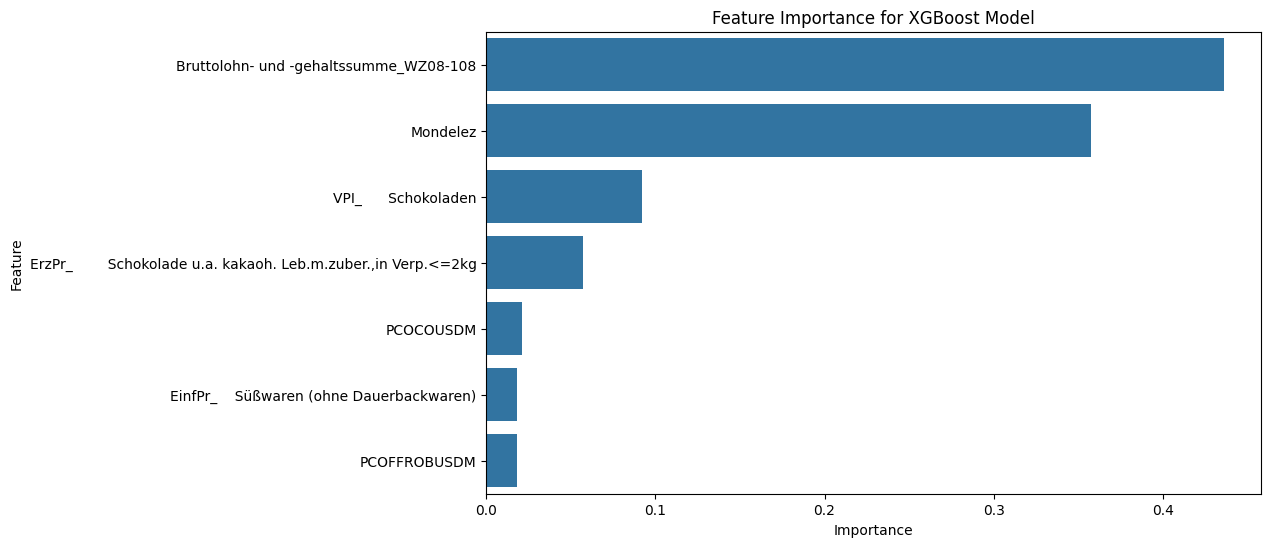

In [21]:
# feature importance for XGBoost model
importances = model_xgb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for XGBoost Model')
plt.show()

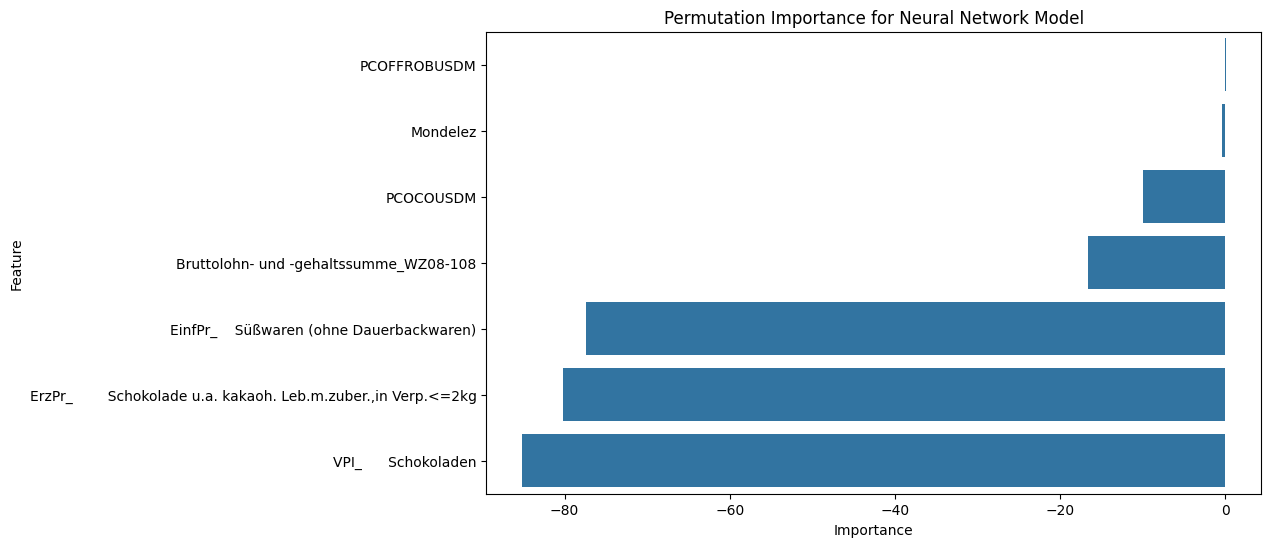

In [23]:
# permutation importance neural network model
# getting feature importance for neural network model using permutation importance  
from sklearn.inspection import permutation_importance
result = permutation_importance(model_nn, X_test_processed, y_test_imputed, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({'Feature': X_train_features, 'Importance': result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# plotting feature importance for neural network model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)   
plt.title('Permutation Importance for Neural Network Model')
plt.show()

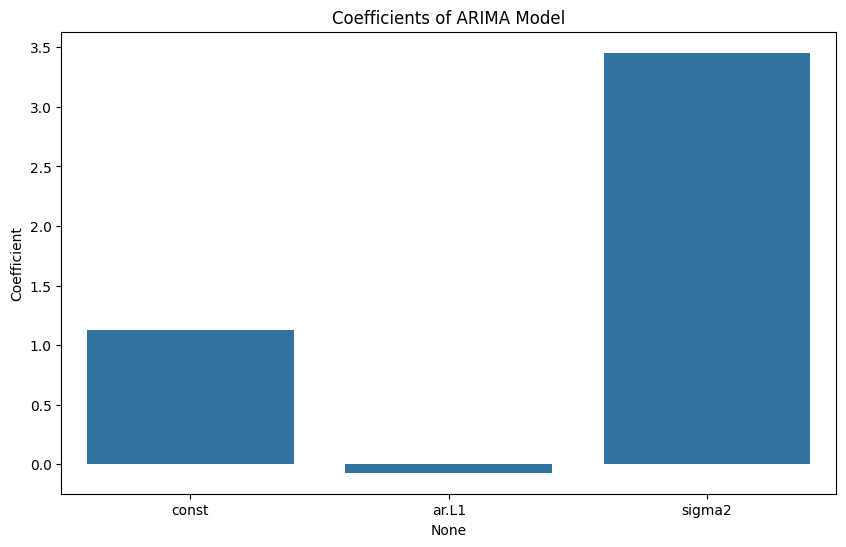

In [24]:
# coefficients of ARIMA model
coefficients = model_arima_fit.params
coefficients_df = pd.DataFrame({'Coefficient': coefficients})

# visualizing coefficients of ARIMA model
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_df.index, y='Coefficient', data=coefficients_df)
plt.title('Coefficients of ARIMA Model')
plt.show()


Coefficient Types in statsmodels <br>
ar.L1, ar.L2, etc. (Autoregressive Coefficients): <br>
Represent the relationship between the current value and past values (lags).<br>
<br>
ma.L1, ma.L2, etc. (Moving Average Coefficients): <br>
Represent the relationship between the current value and past forecast errors (shocks).<br>
<br>
sigma2: The variance of the residuals (white noise).const: <br>
The intercept or mean of the process. <br>
<br>
<br>
2. Interpretation Breakdown <br>
ar.L1 (e.g., 0.9)Positive, < 1: A strong positive coefficient means if the previous day’s value was high, today's will likely be high (trend persistence).<br>
ar.L1 (e.g., -0.5)Negative: A negative coefficient implies a mean-reverting behavior (high value today leads to a lower value tomorrow).<br>
ma.L1 (e.g., -0.9)Negative, high magnitude: Suggests the model is heavily correcting for the previous day’s forecast error, common in rapidly adapting systems.<br>
const Represents the underlying mean of the differenced series (or the raw series if \(d=0\)).<br>
**`P>z

#### Training and Testing on Semi-Rolling Windows

#### Model Training on second batch

In [ ]:
# model fit, prediction and evaluation for batch 2
# repeating the same steps for batch 2 with respective train and test sets  



### How to use classes


In [6]:
from core.classes import FeatureEngineer, DataImputation
from imblearn.pipeline import Pipeline 

In [ ]:
number_train = 70
# the dict has entry of the form column: [lag_0, lag_1,lag_2]
# note that the column must be given by the name and not the number and that if the 
# column should be kept it need to have lag = 0
dict_lag = {}
for k in [39, 41, 43, 45, 78, 88, 93]:
    dict_lag.update({df.columns.values[k]: [1]})
for k in [166, 167, 168, 169, 170]: 
    dict_lag.update({df.columns.values[k]: [0]})

df_selected_col = df.loc[:, list(dict_lag)]
df_train = df_selected_col.iloc[:number_train, :]
df_test = df_selected_col.iloc[number_train: , :]
df_train

pipeline = Pipeline([('DaIm', DataImputation()), 
                     ('FE', FeatureEngineer(dict_lag))])

df_train_transf = pipeline.fit_transform(df_train)
df_test_transf = pipeline.transform(df_test)
df_train_transf

c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\imblearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


,Beschäftigte_WZ08-1082_lag_by_1,Geleistete Arbeitsstunden_WZ08-1082_lag_by_1,Bruttolohn- und -gehaltssumme_WZ08-1082_lag_by_1,Umsatz_WZ08-1082_lag_by_1,"ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lag_by_1",EinfPr_Süßwaren (ohne Dauerbackwaren)_lag_by_1,VPI_Schokoladen_lag_by_1,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
date,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2263.335036,41.053913,6.524211,39.095000,NaN
2019-02-28,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2255.804973,40.666500,6.524211,41.495000,NaN
2019-03-31,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2200.484674,37.174762,6.524211,42.429048,NaN
2019-04-30,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2331.131022,37.427727,6.524211,44.421250,NaN
2019-05-31,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2315.072400,37.748182,6.524211,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,38349.0,4090000.0,151156000.0,8.654190e+08,128.0,184.8,140.3,8380.126610,111.337143,8.442000,62.102500,NaN
2024-07-31,39111.0,4474000.0,145958000.0,8.940960e+08,128.7,184.5,142.3,7164.628035,115.230870,8.581739,61.110870,NaN
2024-08-31,39503.0,4790000.0,143231000.0,1.008190e+09,129.3,186.0,141.5,6791.953817,112.675714,8.002727,63.694545,NaN


### Defining Model with monthly new data

In [ ]:
# defining features with lag and without lag for the monthly model
features_lagged = [39, 41, 43, 45, 78, 88, 93]
features_without_lag = [166, 167, 168, 169, 170]


# time lag of 1 month for the features
X_monthly_lagged1 = df.iloc[:, features_lagged1].shift(1)
# renaming the lagged features to indicate that they are lagged
X_monthly_lagged1.columns = [col + '_lagged' for col in X_monthly_lagged1.columns]

# time lag of 2 month for the features
X_monthly_lagged2 = df.iloc[:, features_lagged1].shift(2)
# renaming the lagged features to indicate that they are lagged
X_monthly_lagged2.columns = [col + '_lagged2' for col in X_monthly_lagged2.columns]

# time lag of 3 month for the features
X_monthly_lagged3 = df.iloc[:, features_lagged1].shift(3)
# renaming the lagged features to indicate that they are lagged
X_monthly_lagged3.columns = [col + '_lagged3' for col in X_monthly_lagged3.columns]

X_monthly_without_lag = df.iloc[:, features_without_lag]
X_monthly = pd.concat([X_monthly_lagged1, X_monthly_lagged2, X_monthly_lagged3, X_monthly_without_lag], axis=1)

# defining target variable for the monthly model
y_monthly = df[target]
X_monthly

,Beschäftigte_WZ08-1082_lagged,Geleistete Arbeitsstunden_WZ08-1082_lagged,Bruttolohn- und -gehaltssumme_WZ08-1082_lagged,Umsatz_WZ08-1082_lagged,"ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged",EinfPr_Süßwaren (ohne Dauerbackwaren)_lagged,VPI_Schokoladen_lagged,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
Datum,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2263.335036,41.053913,NaN,39.095000,NaN
2019-02-28,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2255.804973,40.666500,NaN,41.495000,NaN
2019-03-31,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2200.484674,37.174762,NaN,42.429048,NaN
2019-04-30,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2331.131022,37.427727,NaN,44.421250,NaN
2019-05-31,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2315.072400,37.748182,NaN,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31,40394.0,5028000.0,152502000.0,1.143251e+09,157.4,234.5,167.8,7604.123627,72.351429,8.200000,53.416190,12.290476
2025-09-30,40799.0,4729000.0,149300000.0,1.183673e+09,159.3,235.0,170.2,7006.525856,73.822273,7.976364,53.113636,13.118182
2025-10-31,40849.0,5045000.0,150353000.0,1.493582e+09,163.0,226.6,172.9,5953.567814,73.506818,7.195652,52.461739,13.521739


In [5]:
# seperating train and test data by time
train_size = int(len(df) * 0.9)  # using first 90% of data for training and last 10% for testing
X_train = X_monthly.iloc[:train_size]
X_test = X_monthly.iloc[train_size:]
y_train = y_monthly.iloc[:train_size]
y_test = y_monthly.iloc[train_size:]

#### Defining Monthly Linear Regression Model

In [6]:
# choosing linear regression as first model
from sklearn.linear_model import LinearRegression  
model_baseline = LinearRegression()

#### Filling Nans

In [7]:
# imputation of num_cols:

# defining numerical columns:
num_cols = list(X_train.select_dtypes(exclude='object').columns)

X_train

,Beschäftigte_WZ08-1082_lagged,Geleistete Arbeitsstunden_WZ08-1082_lagged,Bruttolohn- und -gehaltssumme_WZ08-1082_lagged,Umsatz_WZ08-1082_lagged,"ErzPr_Schokolade u.a. kakaoh. Leb.m.zuber.,in Verp.<=2kg_lagged",EinfPr_Süßwaren (ohne Dauerbackwaren)_lagged,VPI_Schokoladen_lagged,PCOCOUSDM,PCOFFROBUSDM,Ferrero,Mondelez,LindtSpruengli
Datum,,,,,,,,,,,,
2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2263.335036,41.053913,NaN,39.095000,NaN
2019-02-28,36176.0,4704000.0,111357000.0,6.619170e+08,97.6,102.4,99.2,2255.804973,40.666500,NaN,41.495000,NaN
2019-03-31,35363.0,4374000.0,106786000.0,7.964770e+08,97.6,102.3,99.9,2200.484674,37.174762,NaN,42.429048,NaN
2019-04-30,34926.0,4294000.0,106900000.0,8.120600e+08,97.4,102.5,101.1,2331.131022,37.427727,NaN,44.421250,NaN
2019-05-31,35197.0,3980000.0,102877000.0,6.919610e+08,97.5,102.3,99.8,2315.072400,37.748182,NaN,46.047045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,39845.0,4812000.0,146513000.0,1.459711e+09,134.6,201.8,142.9,7919.328270,90.764000,7.706667,61.880476,10.421200
2024-12-31,39666.0,4916000.0,221234000.0,1.307285e+09,135.2,216.4,143.6,10412.185712,81.897826,7.911111,58.940000,10.764556
2025-01-31,38759.0,3918000.0,159670000.0,9.805100e+08,135.5,222.4,143.6,10710.345483,82.498636,8.355455,55.738182,11.032909


In [8]:
# last entry od LindtSpruengli
X_train.iloc[-1]['LindtSpruengli']

np.float64(12.243428571428572)

In [9]:
# imputation of num_cols in training data:
for col in num_cols:
    if X_train[col].isna().sum() > 0:
        X_train.loc[X_train[col].isna(), col] = X_train[col].median()
X_train[col].isna().sum()

np.int64(0)

In [10]:
# imputation of num_cols in test set:
for col in num_cols:
    if X_test[col].isna().sum() > 0:
        X_test.loc[X_test[col].isna(), col] = X_test[col].median()
X_test[col].isna().sum()

np.int64(0)

In [11]:
# imputation of target variable in training set:
if y_train.isna().sum() > 0:
    y_train.loc[y_train.isna()] = y_train.median()

In [12]:
# imputation of target variable in test set:
if y_test.isna().sum() > 0:
    y_test.loc[y_test.isna()] = y_train.median()

In [13]:
# fitting the model
model_baseline.fit(X_train, y_train)
print(model_baseline.coef_)  # beta (slope)
print(model_baseline.intercept_) 

[ 3.29600545e+04  4.38461178e+01 -7.23346837e-01 -3.03792017e-01
  4.06761180e+05 -1.73552692e+05  4.87248055e+06  1.57321526e+04
 -1.16445990e+06 -1.84547046e+07  1.93256132e+06  4.17627544e+07]
-1465784062.9111886


#### Validation of Monthly Model

In [14]:
# predicting target variable in test set
target_pred = model_baseline.predict(X_test)

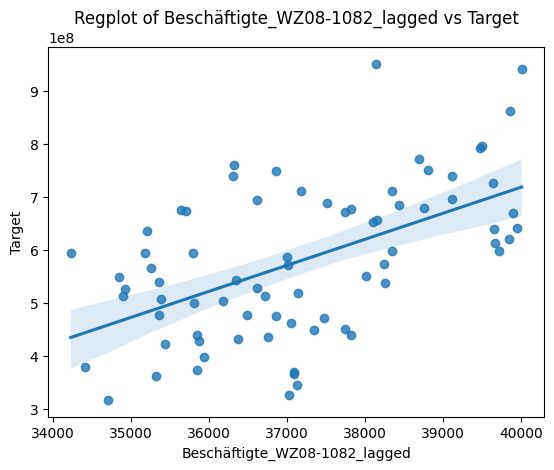

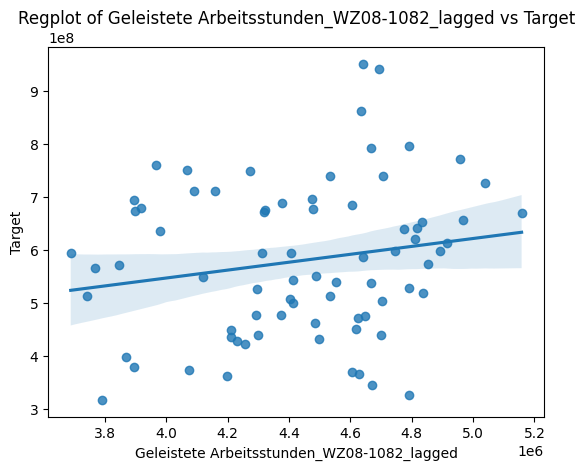

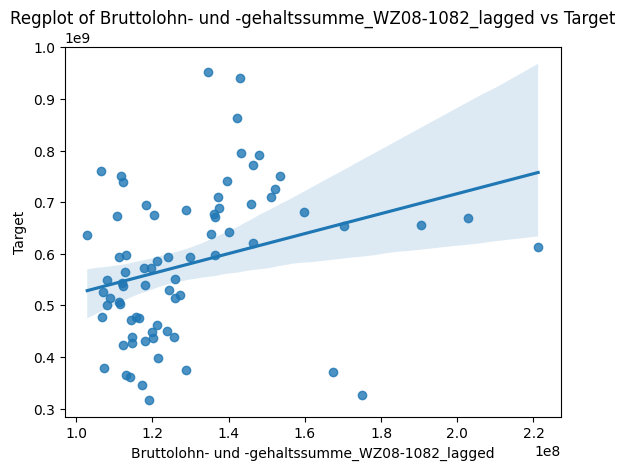

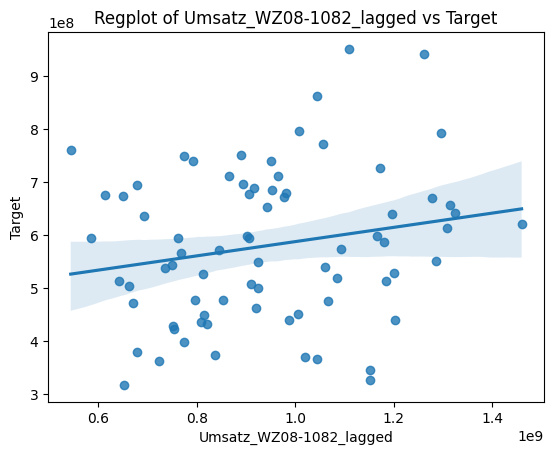

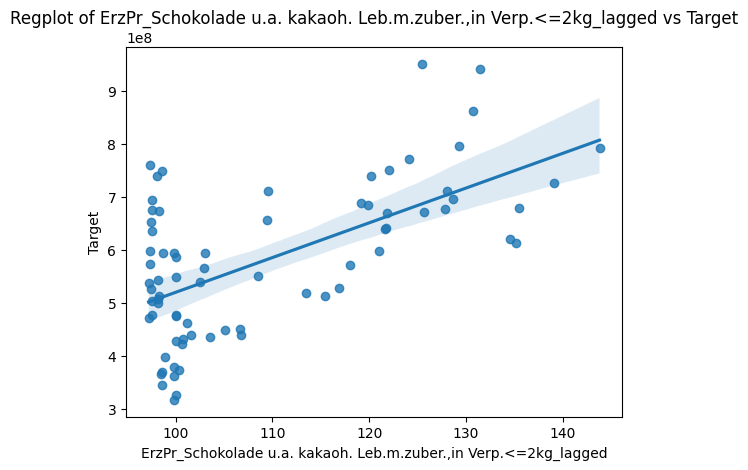

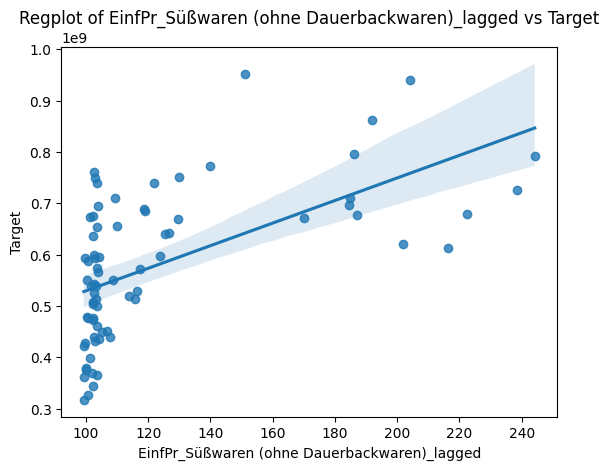

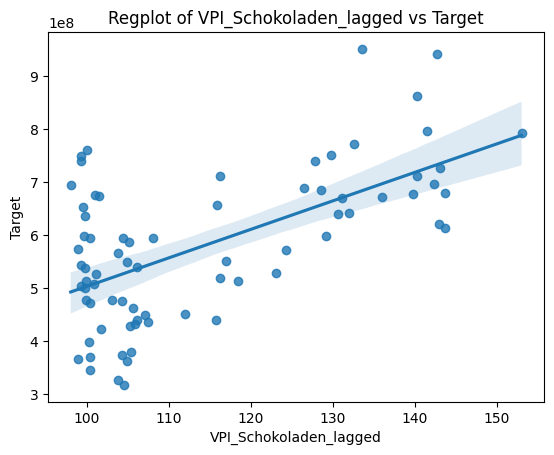

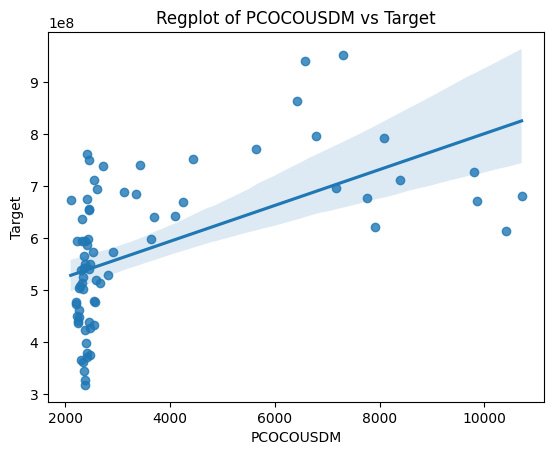

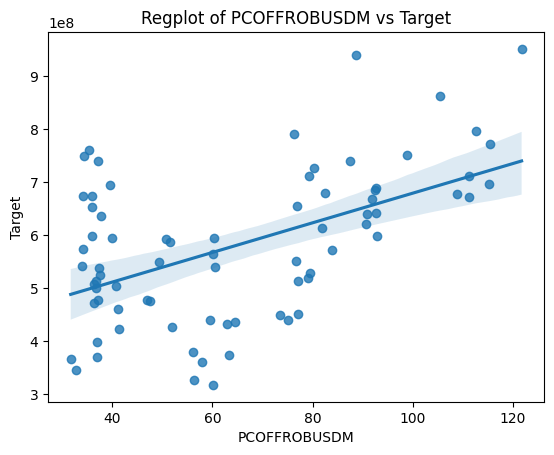

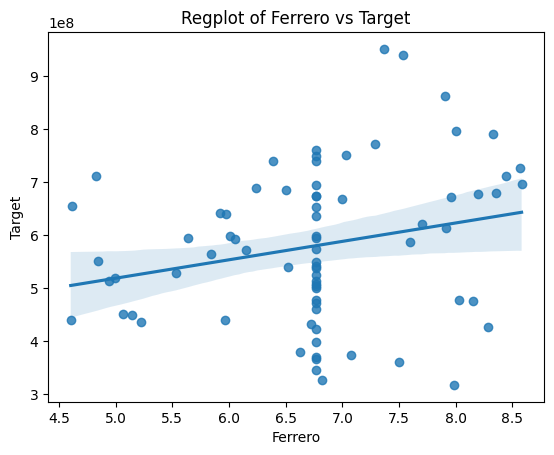

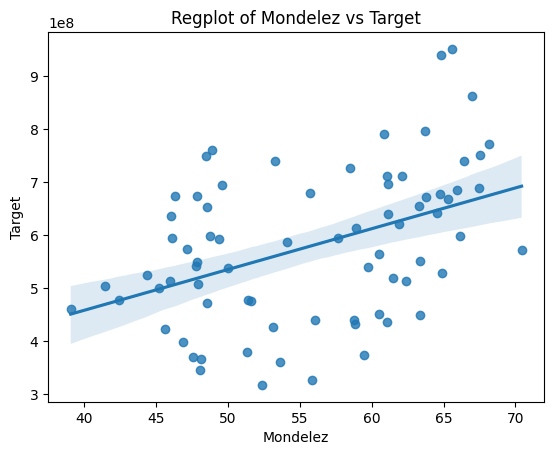

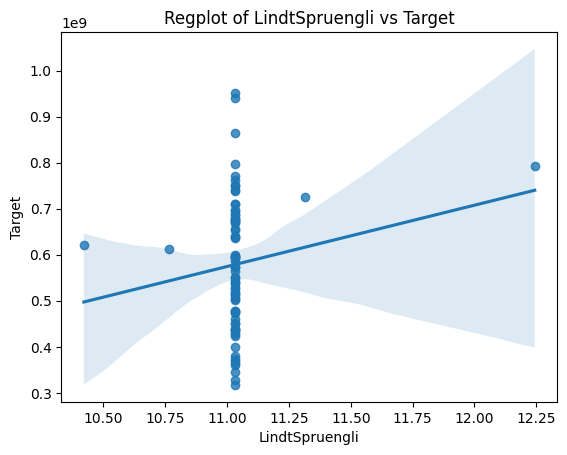

In [15]:
# regplots to visualize the relationship between each feature and the target variable
for col in X_train.columns:
    sns.regplot(x=X_train[col], y=y_train)
    plt.title(f'Regplot of {col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()

In [16]:
# using mean squared error to evaluate the model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, target_pred)**0.5/np.mean(y_test)  # root mean squared error divided by mean of target variable to get a relative error


np.float64(0.7853909839304356)

In [17]:
# data frame with actual and predicted values for line plot
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': target_pred})
results_df.sort_index(inplace=True)  # sort by index to ensure correct order for line plot
results_df

,Actual,Predicted
Datum,,
2025-04-30,808534000.0,8.725687e+08
2025-05-31,874262000.0,9.302201e+08
2025-06-30,394819000.0,1.049814e+09
2025-07-31,409291000.0,1.034781e+09
2025-08-31,449728000.0,9.699332e+08
2025-09-30,514226000.0,9.995838e+08
2025-10-31,515248000.0,9.500998e+08
2025-11-30,535104000.0,9.206985e+08
2025-12-31,573148000.0,8.786508e+08


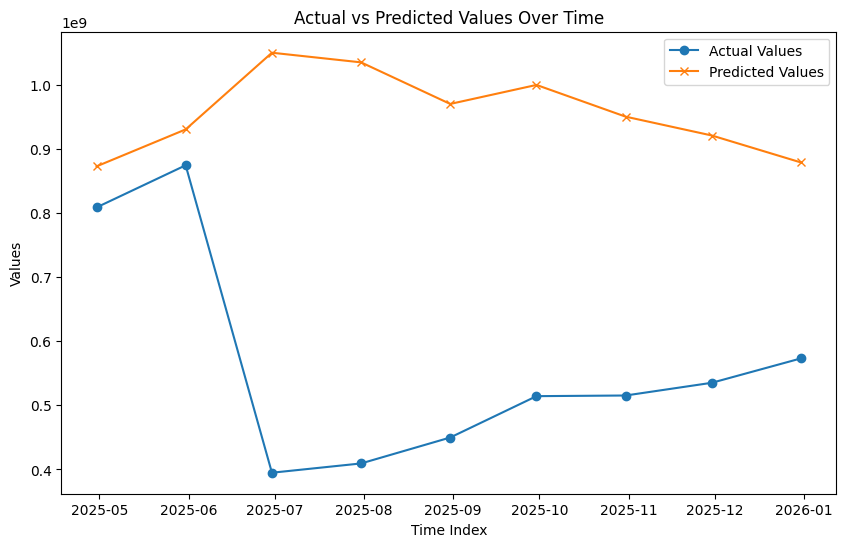

In [18]:
# time series plot based on rsults_df
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Actual'], label='Actual Values', marker='o')
plt.plot(results_df.index, results_df['Predicted'], label='Predicted Values', marker='x')
plt.xlabel('Time Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values Over Time')
plt.legend()
plt.show()

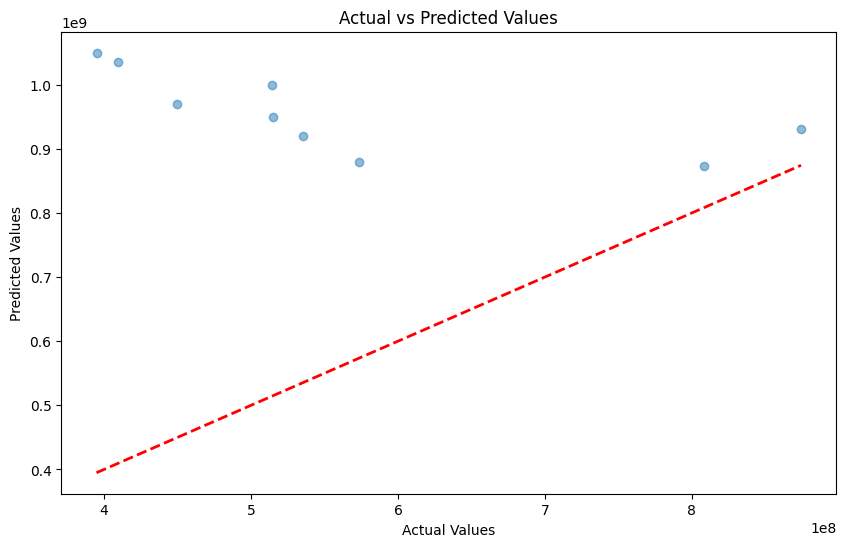

In [19]:
# line plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, target_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [20]:
# using r2 score to evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, target_pred)


-6.759100752750912

### Another Monthly Model

In [21]:
# initiating ARIMA model
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(y_train, order=(5, 1, 0))  # ARIMA(p,d,q) with p=5, d=1, q=0
arima_model_fit = arima_model.fit()
arima_model_fit.summary()
# predicting with ARIMA model
arima_pred = arima_model_fit.forecast(steps=len(y_test))
arima_pred


c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\judit\Portfolioproject_mit_Salima\dpp_projekt_2026\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


2025-04-30    7.989969e+08
2025-05-31    7.453647e+08
2025-06-30    7.156255e+08
2025-07-31    7.087105e+08
2025-08-31    7.205197e+08
2025-09-30    7.427326e+08
2025-10-31    7.533150e+08
2025-11-30    7.479446e+08
2025-12-31    7.379658e+08
Freq: ME, Name: predicted_mean, dtype: float64

ARIMA doesn't work...?